<a href="https://colab.research.google.com/github/rebecca-aquino/teaching/blob/main/DummyVariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Housing Data Import 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

import seaborn as sns
%matplotlib inline 

In [3]:
house_data_path='https://raw.githubusercontent.com/data-doctors/kaggle-house-prices-advanced-regression-techniques/master/data/train.csv'
df_house=pd.read_csv(house_data_path) # invoke Pandas and use read_csv() method passing in the parameter of the csv location, in this case a url address
df_house.head(1) # Visually Inspect that it loaded correctly

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [4]:
df_house.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


#Model 1

In [5]:
lm1= LinearRegression()

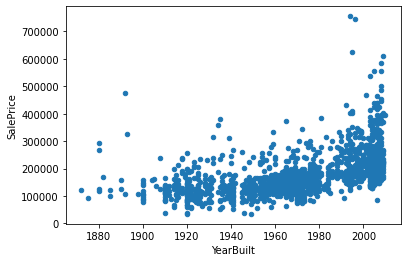

In [6]:
df_house.plot.scatter('YearBuilt','SalePrice')

In [7]:
x= df_house[['YearBuilt']]
y= df_house['SalePrice']

In [8]:
lm1.fit(x, y)
lm1

LinearRegression()

In [9]:
lm1.fit(df_house[['YearBuilt']],df_house[['SalePrice']])
Yhat1=lm1.predict(x)

print(f"intercept:{lm1.intercept_}")
print(f"slope:{lm1.coef_}")

intercept:[-2530308.24573236]
slope:[[1375.37346794]]


## evaluation

In [10]:
mse= mean_squared_error(df_house['SalePrice'], Yhat1)
print('The mean square error of SalePrice and predicted value is: ', mse)

r_sq=lm1.score(df_house[['YearBuilt']],df_house[['SalePrice']])
print(f"coefficiend of determination: {r_sq}")

The mean square error of SalePrice and predicted value is:  4582376228.725916
coefficiend of determination: 0.27342162073249154


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


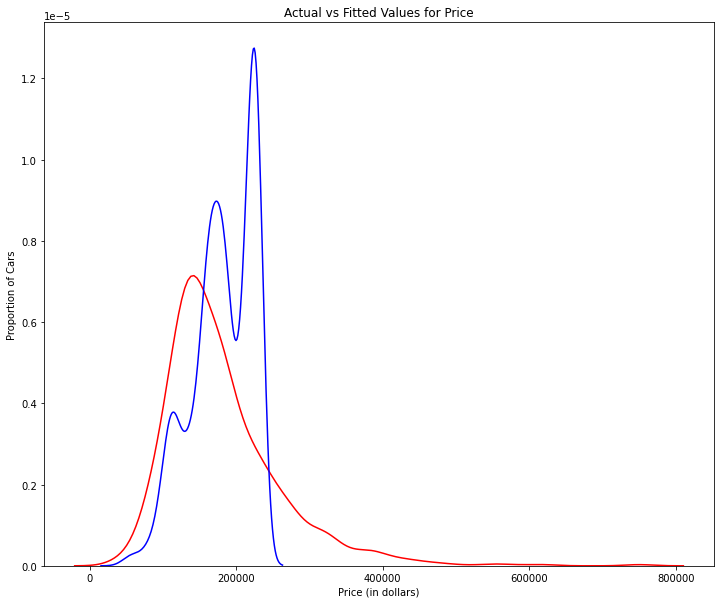

In [11]:
width = 12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_house['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# Model 2

In [12]:
lm2=LinearRegression()

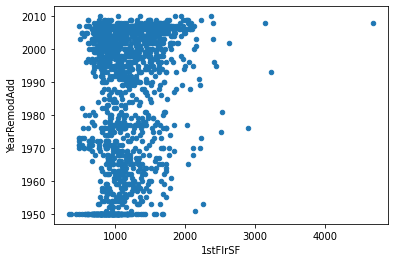

In [13]:
df_house.plot.scatter('1stFlrSF','YearRemodAdd')

In [14]:
x= df_house[['1stFlrSF']]
y= df_house['YearRemodAdd']

In [15]:
lm2.fit(x, y)

LinearRegression()

In [16]:
lm2.fit(df_house[['1stFlrSF']],df_house[['YearRemodAdd']])
Yhat1=lm2.predict(x)

print(f"intercept:{lm1.intercept_}")
print(f"slope:{lm1.coef_}")

intercept:[-2530308.24573236]
slope:[[1375.37346794]]


##Evaluation 

In [17]:
mse= mean_squared_error(df_house['YearRemodAdd'], Yhat1)
print('The mean square error of SalePrice and predicted value is: ', mse)

r_sq=lm2.score(df_house[['1stFlrSF']],df_house[['YearRemodAdd']])
print(f"coefficiend of determination: {r_sq}")

The mean square error of SalePrice and predicted value is:  401.3290840190893
coefficiend of determination: 0.05778219229362136


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


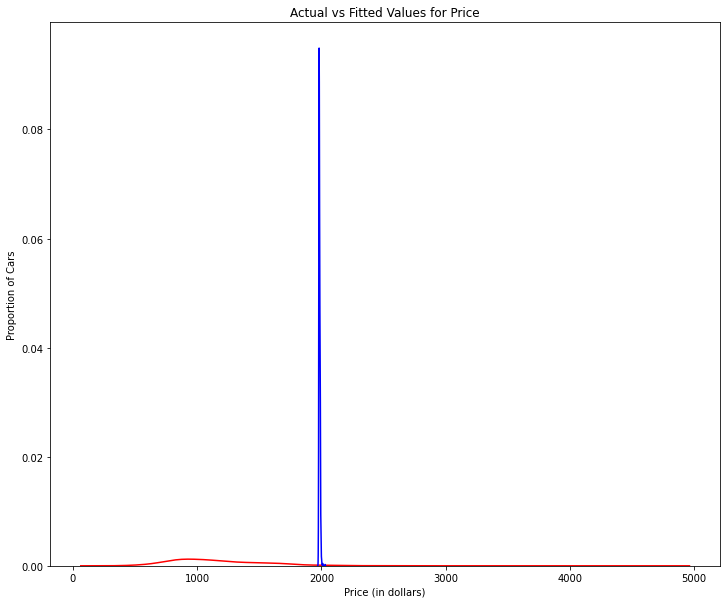

In [18]:
width = 12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_house['1stFlrSF'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#Model 3

In [19]:
lm3=LinearRegression()

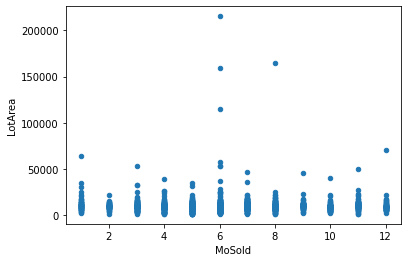

In [20]:
df_house.plot.scatter('MoSold','LotArea')

In [21]:
x= df_house[['MoSold']]
y= df_house['LotArea']

In [22]:
lm3.fit(x,y)

LinearRegression()

In [23]:
lm3.fit(df_house[['MoSold']],df_house[['LotArea']])
Yhat1=lm3.predict(x)

print(f"intercept:{lm1.intercept_}")
print(f"slope:{lm1.coef_}")

intercept:[-2530308.24573236]
slope:[[1375.37346794]]


##Evaluation

In [24]:
mse= mean_squared_error(df_house['LotArea'], Yhat1)
print('The mean square error of SalePrice and predicted value is: ', mse)

r_sq=lm3.score(df_house[['MoSold']],df_house[['LotArea']])
print(f"coefficiend of determination: {r_sq}")

The mean square error of SalePrice and predicted value is:  99557268.34697922
coefficiend of determination: 1.4519966166082199e-06


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


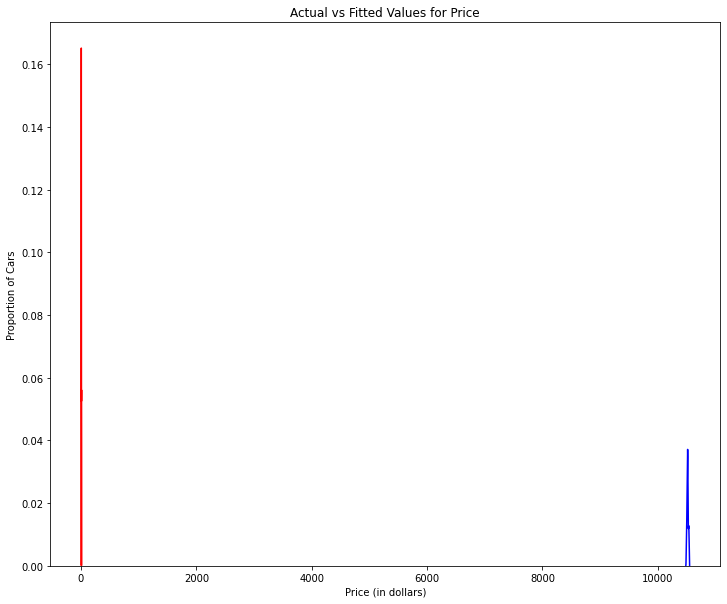

In [25]:
width = 12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_house['MoSold'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#Model 4

In [26]:
lm4=LinearRegression()

In [92]:
x= df_house[['OverallQual']]
y= df_house['GarageArea']

In [93]:
lm4.fit(x,y)

LinearRegression()

In [94]:
lm4.fit(df_house[['OverallQual']],df_house[['GarageArea']])
Yhat1=lm4.predict(x)

print(f"intercept:{lm1.intercept_}")
print(f"slope:{lm1.coef_}")

intercept:[-2530308.24573236]
slope:[[1375.37346794]]


##Evaluate 

In [97]:
mse= mean_squared_error(df_house['GarageArea'], Yhat1)
print('The mean square error of Saleprice and predicted value is: ', mse)

r_sq=lm4.score(df_house[['OverallQual']],df_house[['GarageArea']])
print(f"coefficiend of determination: {r_sq}")

The mean square error of Saleprice and predicted value is:  31251.95013641809
coefficiend of determination: 0.3158684549059213


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


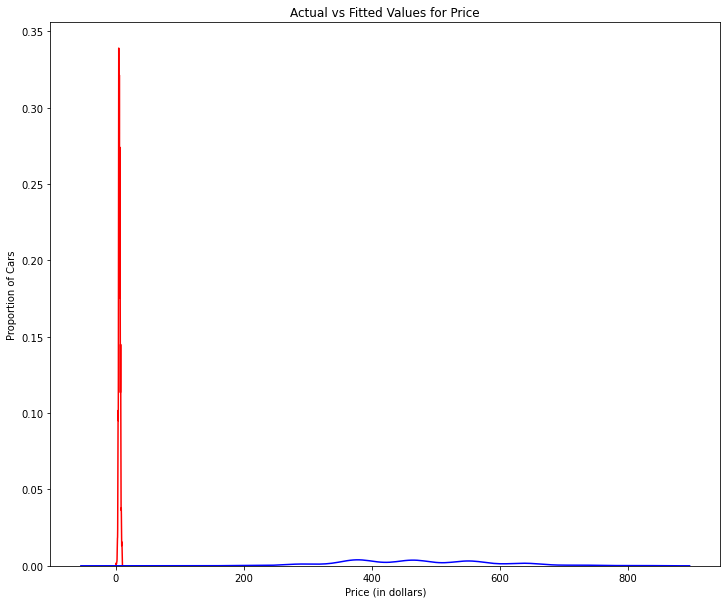

In [98]:
width = 12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_house['OverallQual'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#Model 5

In [33]:
lm5=LinearRegression()

In [87]:
x= df_house[['1stFlrSF']]
y= df_house['2ndFlrSF']

In [88]:
lm5.fit(x,y)

LinearRegression()

In [89]:
lm5.fit(df_house[['1stFlrSF']],df_house[['2ndFlrSF']])
Yhat1=lm5.predict(x)

print(f"intercept:{lm1.intercept_}")
print(f"slope:{lm1.coef_}")

intercept:[-2530308.24573236]
slope:[[1375.37346794]]


##Evaluate 

In [90]:
mse= mean_squared_error(df_house['2ndFlrSF'], Yhat1)
print('The mean square error of Saleprice and predicted value is: ', mse)

r_sq=lm5.score(df_house[['1stFlrSF']],df_house[['2ndFlrSF']])
print(f"coefficiend of determination: {r_sq}")

The mean square error of Saleprice and predicted value is:  182606.5998471715
coefficiend of determination: 0.04106547467482524


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


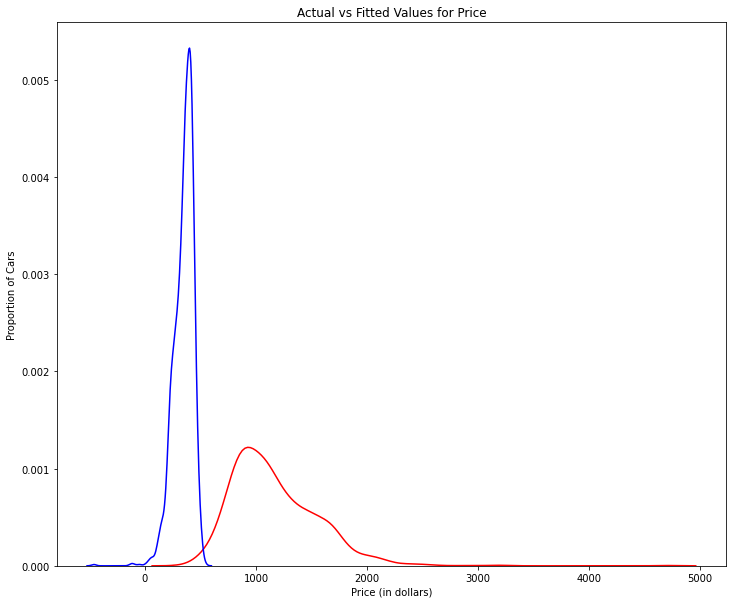

In [91]:
width = 12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_house['1stFlrSF'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#Model 6

In [40]:
lm6= LinearRegression()

In [67]:
x= df_house[['MoSold']]
y= df_house['GarageArea']

In [42]:
lm6.fit(x,y)

LinearRegression()

In [77]:
lm6.fit(df_house[['MoSold']],df_house[['GarageArea']])
Yhat1=lm6.predict(x)

print(f"intercept:{lm1.intercept_}")
print(f"slope:{lm1.coef_}")

intercept:[-2530308.24573236]
slope:[[1375.37346794]]


##Evaluate 

In [79]:
mse= mean_squared_error(df_house['GarageArea'], Yhat1)
print('The mean square error of Saleprice and predicted value is: ', mse)

r_sq=lm6.score(df_house[['MoSold']],df_house[['GarageArea']])
print(f"coefficiend of determination: {r_sq}")

The mean square error of Saleprice and predicted value is:  64899.88553442727
coefficiend of determination: 0.0007825334765676484


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


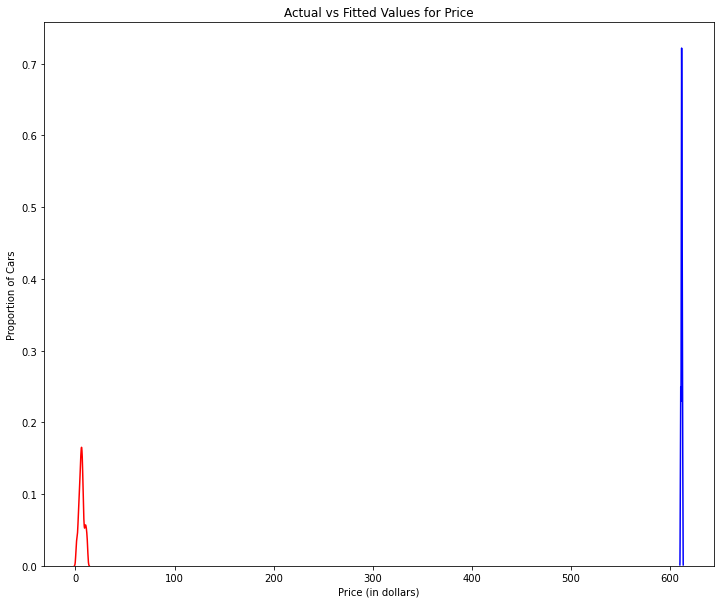

In [81]:
width = 12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_house['MoSold'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#Model 7

In [82]:
lm7= LinearRegression()

In [83]:
x= df_house[['BsmtFinSF1']]
y= df_house['BsmtFinSF2']

In [84]:
lm7.fit(x,y)

LinearRegression()

In [85]:
lm7.fit(df_house[['BsmtFinSF1']],df_house[['BsmtFinSF2']])
Yhat1=lm7.predict(x)

print(f"intercept:{lm1.intercept_}")
print(f"slope:{lm1.coef_}")

intercept:[-2530308.24573236]
slope:[[1375.37346794]]


##Evaluate 

In [86]:
mse= mean_squared_error(df_house['BsmtFinSF2'], Yhat1)
print('The mean square error of Saleprice and predicted value is: ', mse)

r_sq=lm7.score(df_house[['BsmtFinSF1']],df_house[['BsmtFinSF2']])
print(f"coefficiend of determination: {r_sq}")

The mean square error of Saleprice and predicted value is:  25940.762306526125
coefficiend of determination: 0.0025117537874861373


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


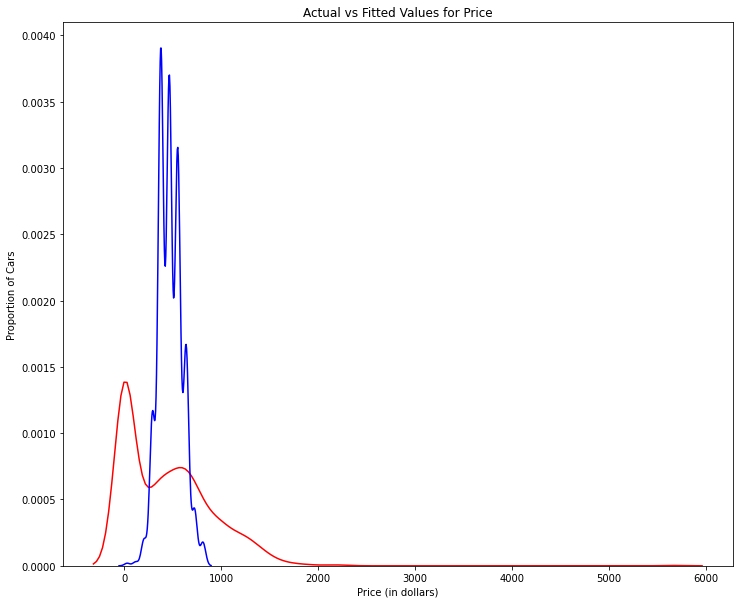

In [99]:
width = 12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_house['BsmtFinSF1'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()